# Observing the effect of Convolution and Pooling.

In [1]:
from cv2 import imread, IMREAD_GRAYSCALE
import matplotlib.pyplot as plt
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

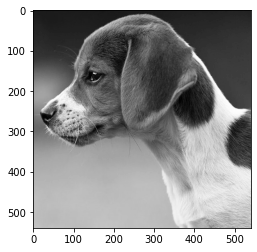

In [2]:
img = imread('demo.jpg', IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray');

In [3]:
img = img.reshape(1, img.shape[0], img.shape[1], 1) # Adding 1s to indicate batch and grayscale image
img.shape

(1, 540, 540, 1)

In [4]:
conv_test = Sequential(Convolution2D(filters = 1, kernel_size = (10, 10), input_shape = img.shape[1:]))
conv = conv_test.predict(img)

(1, 531, 531, 1)


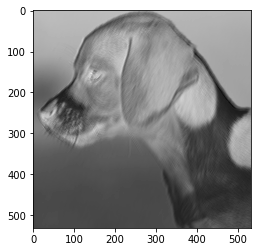

In [5]:
plt.imshow(conv.reshape(conv.shape[1], conv.shape[2]), cmap = 'gray');
print(conv.shape)

In [6]:
conv_test = Sequential([Convolution2D(filters = 1, kernel_size = (10, 10), input_shape = img.shape[1:]),
                        Activation('relu')
                       ])
conv_relu = conv_test.predict(img)

(1, 531, 531, 1)


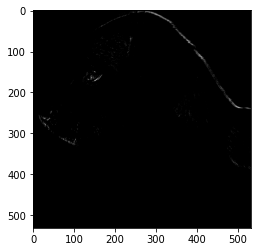

In [7]:
plt.imshow(conv_relu.reshape(conv_relu.shape[1], conv_relu.shape[2]), cmap = 'gray');
print(conv_relu.shape)

In [8]:
conv_test = Sequential([Convolution2D(filters = 1, kernel_size = (10, 10), input_shape = img.shape[1:]),
                        Activation('relu'),
                        MaxPooling2D(pool_size = (2,2))
                       ])
conv_relu_max = conv_test.predict(img)

(1, 265, 265, 1)


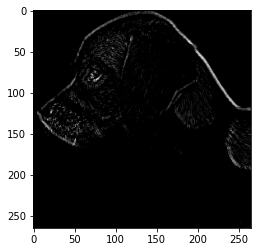

In [9]:
plt.imshow(conv_relu_max.reshape(conv_relu_max.shape[1], conv_relu_max.shape[2]), cmap = 'gray');
print(conv_relu_max.shape)

In [10]:
conv_test.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 531, 531, 1)       101       
                                                                 
 activation_1 (Activation)   (None, 531, 531, 1)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 265, 265, 1)      0         
 )                                                               
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Shape (1) :  540 - 10 + 1 = 531

Params : (10 * 10) + (1 * 1) = 101

Shape (3) : Floor((531 - 2) / 2) + 1 = 265

<hr>